In [100]:
import pandas as pd
import seaborn as sb


In [101]:
dataset = pd.read_csv("winequality-white_ruba.csv")

dataset = dataset.drop(columns=['fixed acidity','total sulfur dioxide', 'citric acid', 'sulphates'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
nd = scaler.fit_transform(dataset)
nd = pd.DataFrame(nd, columns = dataset.columns)

nd

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,density,pH,alcohol,quality,qual
0,0.186275,0.308282,0.106825,0.149826,0.267785,0.254545,0.129032,0.500000,0.0
1,0.215686,0.015337,0.118694,0.041812,0.132832,0.527273,0.241935,0.500000,0.0
2,0.196078,0.096626,0.121662,0.097561,0.154039,0.490909,0.338710,0.500000,0.0
3,0.147059,0.121166,0.145401,0.156794,0.163678,0.427273,0.306452,0.500000,0.0
4,0.147059,0.121166,0.145401,0.156794,0.163678,0.427273,0.306452,0.500000,0.0
...,...,...,...,...,...,...,...,...,...
4893,0.127451,0.015337,0.089021,0.076655,0.077694,0.500000,0.516129,0.500000,0.0
4894,0.235294,0.113497,0.112760,0.191638,0.150183,0.390909,0.258065,0.333333,0.0
4895,0.156863,0.009202,0.094955,0.097561,0.104685,0.245455,0.225806,0.500000,0.0
4896,0.205882,0.007669,0.038576,0.062718,0.030461,0.563636,0.774194,0.666667,1.0


In [102]:
X = nd.iloc[: , :8]

Y = nd.iloc[: , 8]

X

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,density,pH,alcohol,quality
0,0.186275,0.308282,0.106825,0.149826,0.267785,0.254545,0.129032,0.500000
1,0.215686,0.015337,0.118694,0.041812,0.132832,0.527273,0.241935,0.500000
2,0.196078,0.096626,0.121662,0.097561,0.154039,0.490909,0.338710,0.500000
3,0.147059,0.121166,0.145401,0.156794,0.163678,0.427273,0.306452,0.500000
4,0.147059,0.121166,0.145401,0.156794,0.163678,0.427273,0.306452,0.500000
...,...,...,...,...,...,...,...,...
4893,0.127451,0.015337,0.089021,0.076655,0.077694,0.500000,0.516129,0.500000
4894,0.235294,0.113497,0.112760,0.191638,0.150183,0.390909,0.258065,0.333333
4895,0.156863,0.009202,0.094955,0.097561,0.104685,0.245455,0.225806,0.500000
4896,0.205882,0.007669,0.038576,0.062718,0.030461,0.563636,0.774194,0.666667


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y) #large amount of values 50% split


In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)


RandomForestClassifier()

In [105]:
prediction = classifier.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [107]:
print(classification_report(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       768
         1.0       1.00      1.00      1.00       212

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980

[[768   0]
 [  0 212]]


<AxesSubplot:>

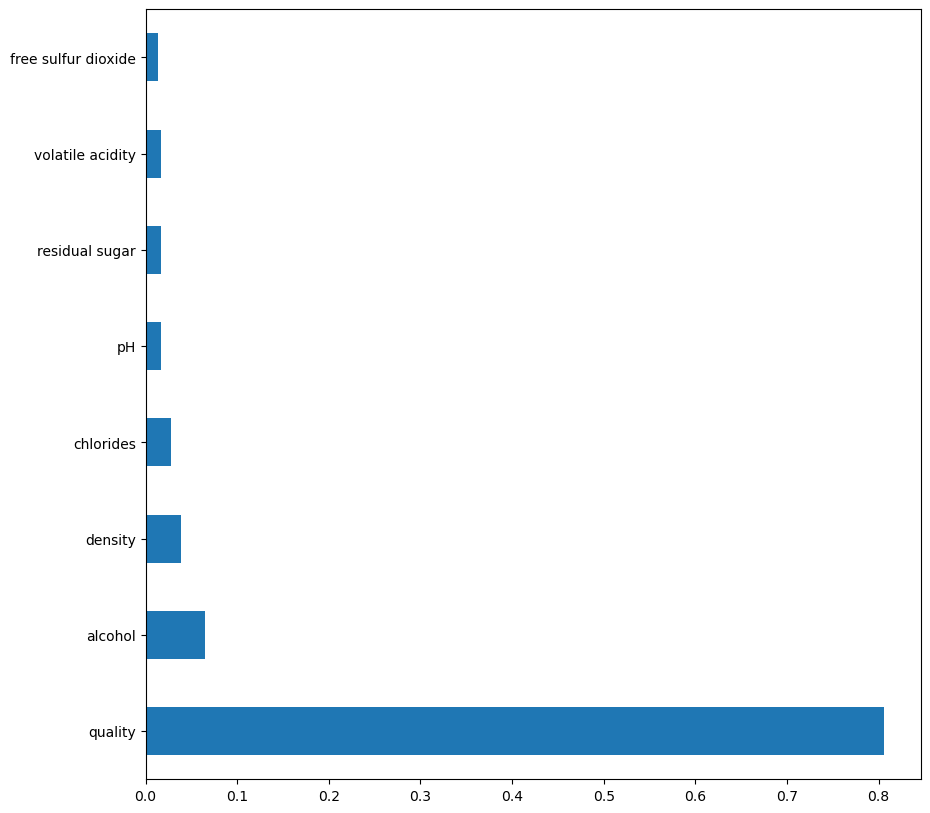

In [108]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))